In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Auto.data'

In [3]:
X0 = pd.read_csv(fname, sep = '\s+')
Nrow, Ncol = X0.shape

In [4]:
X0.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


In [5]:
# some rows in 'horsepower' can't be converted to floats (missing data), disregard
X = X0.copy()
for i in range(Nrow):
    try:
        float(X0.loc[i, 'horsepower'])
    except ValueError:
        X = X.drop([i], axis = 0)
X['horsepower'] = X['horsepower'].astype(float)

In [6]:
X = X.dropna(axis = 0, how = 'any')

9 - (b) What is the range of each quantitative predictor?  
9 - (c) What is the mean and standard deviation of each quantitative predictor?

In [7]:
X.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


9 - (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [8]:
X2 = X.drop(list(range(9, 32)) + list(range(33, 85)), axis = 0)

In [9]:
X2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.368454,5.381703,187.753943,100.955836,2939.643533,15.718297,77.132492,1.599369
std,7.880898,1.658135,99.939488,35.895567,812.649629,2.693813,3.110026,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


9 - (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.  
9 - (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [10]:
fcols = X.columns.copy()
X = X.reset_index(drop = True)

In [11]:
X.columns = fcols

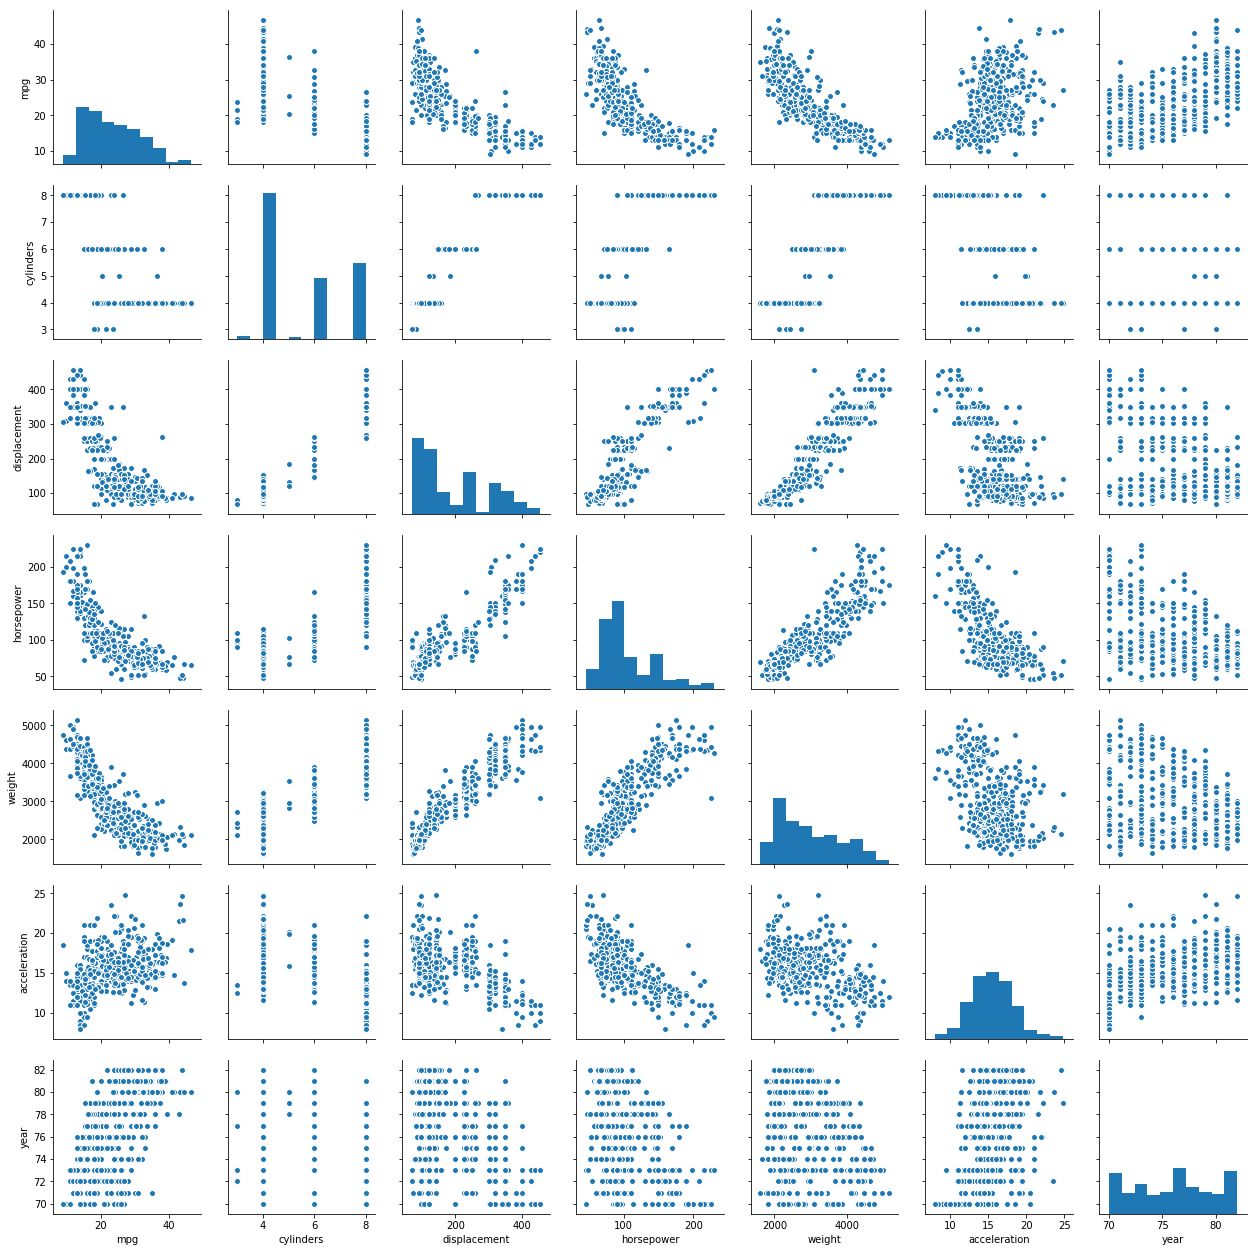

In [12]:
sns.pairplot(X.iloc[:, :-2])

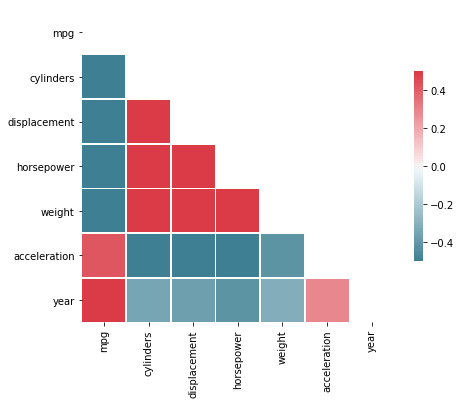

In [13]:
# the correlation removes the variance thus X2 / X makes no difference
Y = X.iloc[:, :-2].corr()
plt.figure(figsize = (7, 7))
# Generate a mask for the upper triangle
mask = np.zeros_like(Y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Y, mask=mask, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5})

In [14]:
# since there are too many unique 'name', create 'brand' column instead
Nrow, Ncol = X.shape
brands = []
for i in range(Nrow):
    ibrand = X['name'].iloc[i].split(' ')[0]
    brands.append(ibrand)
brands = pd.DataFrame(brands, columns = ['brand'])
X = pd.concat([X, brands], axis = 1)

In [15]:
brands0 = X['brand'].value_counts()

/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/pinqingkan/an

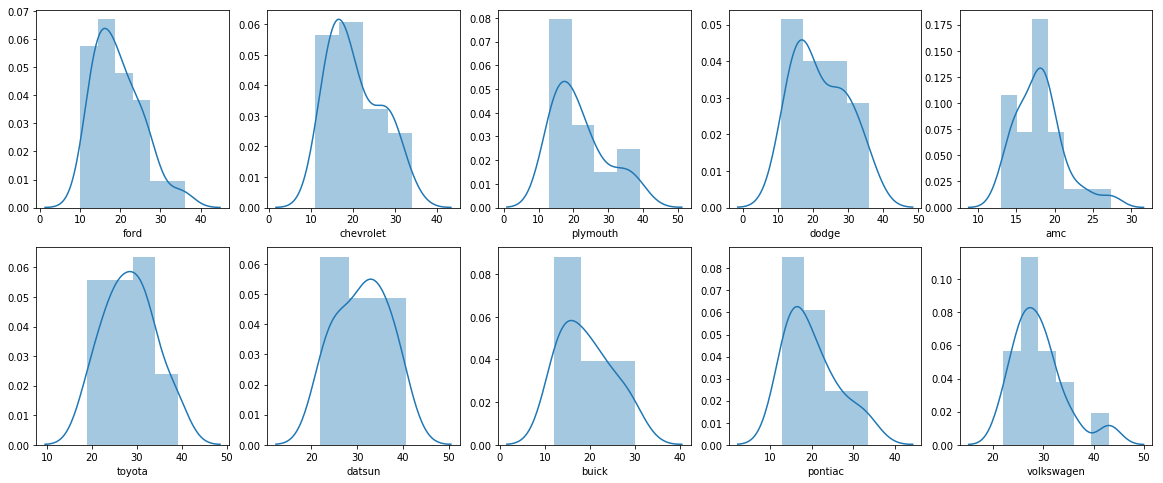

In [16]:
plt.figure(figsize = (20, 8))
cnt = 0
for ibrand in range(len(brands0)):
    if brands0[ibrand] < 15: continue # only keep brands with 'enough' observations
    cnt += 1
    plt.subplot(2, 5, cnt)
    sns.distplot(X[X['brand'] == brands0.index[ibrand]]['mpg'])
    plt.xlabel(brands0.index[ibrand])

The mpg is found positively correlated with acceleration and year, while negatively correlated with cylinders, displacement, horsepower and weight. Certain brands (such as toyota) are found having higher mpg than others (such as dodge), although it could be that the existing observations for the former consist mostly cars of smaller weight and horsepower, etc.